In [4]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [33]:

df = pd.read_csv('datatran2019.csv',encoding="ISO-8859-1", sep=';')
df_municipio = pd.read_csv('datatran2019.csv',encoding="ISO-8859-1", sep=';', usecols= ['municipio'])
df_br = pd.read_csv('datatran2019.csv',encoding="ISO-8859-1", sep=';', usecols= ['br'])
df_km = pd.read_csv('datatran2019.csv',encoding="ISO-8859-1", sep=';', usecols= ['km'])
df_feridos = pd.read_csv('datatran2019.csv',encoding="ISO-8859-1", sep=';', usecols= ['feridos'])
df_feridos_graves = pd.read_csv('datatran2019.csv',encoding="ISO-8859-1", sep=';', usecols= ['feridos_graves'])
df_veiculos = pd.read_csv('datatran2019.csv',encoding="ISO-8859-1", sep=';', usecols= ['veiculos'])
df_ilesos = pd.read_csv('datatran2019.csv',encoding="ISO-8859-1", sep=';', usecols= ['ilesos'])
df_mortos = pd.read_csv('datatran2019.csv',encoding="ISO-8859-1", sep=';', usecols= ['mortos'])
df_pessoas = pd.read_csv('datatran2019.csv',encoding="ISO-8859-1", sep=';', usecols= ['pessoas'])


In [38]:
df.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,67556.000000,67458.000000,67556.000000,67556.000000,67556.000000,67556.000000,67556.000000,67556.000000,67556.000000,67556.000000
mean,222162.356771,215.365294,2.405338,0.079016,0.896427,0.275801,1.016845,0.137249,1.172227,1.660963
std,23695.828298,131.992468,1.978553,0.322502,1.136344,0.625717,1.505713,0.406618,1.268330,0.726082
min,182210.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,202313.750000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,221731.500000,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,241430.500000,343.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,466732.000000,495.000000,74.000000,7.000000,43.000000,22.000000,62.000000,10.000000,49.000000,14.000000


In [39]:
df.sample(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
30408,203836.0,2019-04-17,quarta-feira,08:20:00,ES,393.0,"0,8",CACHOEIRO DE ITAPEMIRIM,Mal Súbito,Saída de leito carroçável,...,0,0,0,1,1,"-20,841324","-41,15929",SPRF-ES,DEL03-ES,UOP02-DEL03-ES
58712,247804.0,2019-11-07,quinta-feira,19:00:00,SE,235.0,53,ITABAIANA,Ingestão de álcool e/ou substâncias psicoativa...,Atropelamento de Pedestre,...,1,1,0,1,1,"-10,684707","-37,440544",SPRF-SE,DEL01-SE,UOP02-DEL01-SE
67185,263879.0,2019-12-27,sexta-feira,06:30:00,MG,116.0,545,SANTA BARBARA DO LESTE,Falta de Atenção à Condução,Colisão transversal,...,0,1,0,4,2,"-19,92809401","-42,13103837",SPRF-MG,DEL06-MG,UOP02-DEL06-MG
22827,192073.0,2019-02-18,segunda-feira,05:57:00,SC,101.0,191,BIGUACU,Pista Escorregadia,Saída de leito carroçável,...,0,3,0,1,1,"-27,4847","-48,6476",SPRF-SC,DEL01-SC,UOP01-DEL01-SC
5289,206777.0,2019-04-29,segunda-feira,04:45:00,SC,470.0,"60,5",BLUMENAU,Falta de Atenção à Condução,Colisão frontal,...,0,2,0,0,2,"-26,88138","-49,164543",SPRF-SC,DEL04-SC,UOP01-DEL04-SC


In [37]:
df = df.drop_duplicates()
df.shape

(67556, 30)

In [43]:
df.isnull().sum()


id                         0
data_inversa               0
dia_semana                 0
horario                    0
uf                         0
br                        98
km                        98
municipio                  0
causa_acidente             0
tipo_acidente             17
classificacao_acidente     0
fase_dia                   0
sentido_via                0
condicao_metereologica     0
tipo_pista                 0
tracado_via                0
uso_solo                   0
pessoas                    0
mortos                     0
feridos_leves              0
feridos_graves             0
ilesos                     0
ignorados                  0
feridos                    0
veiculos                   0
latitude                   0
longitude                  0
regional                   2
delegacia                 49
uop                       54
dtype: int64

In [47]:
df.isnull().any()

id                        False
data_inversa              False
dia_semana                False
horario                   False
uf                        False
br                         True
km                         True
municipio                 False
causa_acidente            False
tipo_acidente              True
classificacao_acidente    False
fase_dia                  False
sentido_via               False
condicao_metereologica    False
tipo_pista                False
tracado_via               False
uso_solo                  False
pessoas                   False
mortos                    False
feridos_leves             False
feridos_graves            False
ilesos                    False
ignorados                 False
feridos                   False
veiculos                  False
latitude                  False
longitude                 False
regional                   True
delegacia                  True
uop                        True
dtype: bool

In [46]:
df[df.isnull().T.any()] 

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
105,183442.0,2019-01-04,sexta-feira,17:10:00,SC,280.0,"230,2",CANOINHAS,Defeito Mecânico no Veículo,NaN,...,0,1,0,0,1,"-26,187521","-50,361839",SPRF-SC,DEL06-SC,UOP04-DEL06-SC
464,185300.0,2019-01-14,segunda-feira,23:20:00,MA,222.0,628,ACAILANDIA,Pista Escorregadia,NaN,...,1,1,0,1,2,"-4,778386","-47,130708",SPRF-MA,DEL04-MA,UOP03-DEL04-MA
497,185443.0,2019-01-15,terça-feira,20:52:00,ES,101.0,148,LINHARES,Ingestão de Álcool,NaN,...,0,2,0,0,2,"-19,38471211","-40,06733363",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
521,185538.0,2019-01-16,quarta-feira,08:40:00,GO,NaN,NaN,CATALAO,Falta de Atenção à Condução,Colisão transversal,...,0,1,0,1,2,"-18,10702393","-47,8894043",SPRF-GO,DEL06-GO,UOP01-DEL06-GO
771,186746.0,2019-01-22,terça-feira,07:35:00,PA,155.0,343,MARABA,Não guardar distância de segurança,NaN,...,0,1,0,1,2,"-5,369574","-49,077969",SPRF-PA,DEL03-PA,UOP01-DEL03-PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66911,259717.0,2019-12-30,segunda-feira,14:30:00,MS,NaN,NaN,NAVIRAI,Falta de Atenção à Condução,Colisão traseira,...,0,2,0,0,2,"-23,26208614","-53,71231209",SPRF-PR,DEL06-PR,UOP03-DEL06-PR
67296,269412.0,2019-06-11,terça-feira,17:09:00,PR,476.0,"118,7",COLOMBO,Desobediência às normas de trânsito pelo pedestre,Queda de ocupante de veículo,...,1,0,1,1,1,"-25,35634","-49,180828",SPRF-PR,DEL01-PR,NaN
67332,273207.0,2019-08-20,terça-feira,09:00:00,PB,NaN,NaN,JOAO PESSOA,Falta de Atenção à Condução,Colisão com objeto estático,...,0,1,0,0,1,"-7,10100978","-34,83236974",SPRF-PB,DEL01-PB,UOP01-DEL01-PB
67356,276149.0,2019-12-10,terça-feira,00:56:00,PR,NaN,NaN,CURITIBA,Falta de Atenção à Condução,Queda de ocupante de veículo,...,0,0,0,1,1,"-25,52139792","-49,33461527",SPRF-PR,DEL01-PR,UAP06-DEL01-PR


In [67]:
df.loc[df.tipo_acidente.isnull(),'tipo_acidente'] = 'Sem registro'
df.loc[df.br.isnull(),'br'] = 'Sem registro'
df.loc[df.km.isnull(),'km'] = 'Sem registro'
df.loc[df.uop.isnull(),'uop'] = 'Sem registro'
df.loc[df.regional.isnull(),'regional'] = 'Sem registro'
df.loc[df.delegacia.isnull(),'delegacia'] = 'Sem registro'

In [69]:
df.loc[[521,464], :]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
521,185538.0,2019-01-16,quarta-feira,08:40:00,GO,Sem registro,Sem registro,CATALAO,Falta de Atenção à Condução,Colisão transversal,...,0,1,0,1,2,"-18,10702393","-47,8894043",SPRF-GO,DEL06-GO,UOP01-DEL06-GO
464,185300.0,2019-01-14,segunda-feira,23:20:00,MA,222.0,628,ACAILANDIA,Pista Escorregadia,Sem registro,...,1,1,0,1,2,"-4,778386","-47,130708",SPRF-MA,DEL04-MA,UOP03-DEL04-MA


In [70]:
df.isnull().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
regional                  0
delegacia                 0
uop                       0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67556 entries, 0 to 67555
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      67556 non-null  float64
 1   data_inversa            67556 non-null  object 
 2   dia_semana              67556 non-null  object 
 3   horario                 67556 non-null  object 
 4   uf                      67556 non-null  object 
 5   br                      67556 non-null  object 
 6   km                      67556 non-null  object 
 7   municipio               67556 non-null  object 
 8   causa_acidente          67556 non-null  object 
 9   tipo_acidente           67556 non-null  object 
 10  classificacao_acidente  67556 non-null  object 
 11  fase_dia                67556 non-null  object 
 12  sentido_via             67556 non-null  object 
 13  condicao_metereologica  67556 non-null  object 
 14  tipo_pista              67556 non-null

In [78]:
df[df.duplicated()]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop


In [79]:
df = df.set_index('id')
df

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
id,,,,,,,,,,,,,,,,,,,,,
182256.0,2019-01-01,terça-feira,04:00:00,CE,116.0,"136,9",RUSSAS,Animais na Pista,Atropelamento de Animal,Sem Vítimas,...,0,1,0,0,1,"-4,766018","-38,056034",SPRF-CE,DEL03-CE,UOP01-DEL03-CE
182263.0,2019-01-01,terça-feira,05:00:00,MT,158.0,"599,5",AGUA BOA,Defeito Mecânico no Veículo,Incêndio,Sem Vítimas,...,0,1,0,0,1,"-14,319","-52,169",SPRF-MT,DEL07-MT,UOP02-DEL07-MT
182277.0,2019-01-01,terça-feira,10:00:00,PA,10.0,34,DOM ELISEU,Velocidade Incompatível,Colisão traseira,Sem Vítimas,...,0,6,0,0,2,"-4,15296734","-47,54608154",SPRF-PA,DEL02-PA,UOP02-DEL02-PA
182289.0,2019-01-01,terça-feira,08:30:00,BA,101.0,13,RIO REAL,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,...,0,1,0,1,2,"-11,5896","-37,8761",SPRF-SE,DEL02-SE,UOP03-DEL02-SE
182307.0,2019-01-01,terça-feira,13:50:00,BA,116.0,440,FEIRA DE SANTANA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,...,1,1,0,2,2,"-12,344","-39,087",SPRF-BA,DEL02-BA,UOP01-DEL02-BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444933.0,2019-09-10,terça-feira,17:15:00,TO,153.0,410,MIRANORTE,Falta de Atenção à Condução,Saída de leito carroçável,Com Vítimas Feridas,...,0,0,0,1,1,"-9,49885975","-48,58649141",SPRF-TO,DEL02-TO,UOP02-DEL02-TO
459923.0,2019-06-15,sábado,05:30:00,SP,116.0,"209,8",GUARULHOS,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Feridas,...,1,1,0,1,1,"-23,42511799","-46,40221101",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
460497.0,2019-04-20,sábado,01:00:00,RJ,101.0,67,CAMPOS DOS GOYTACAZES,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,...,0,0,0,2,1,"-21,76751094","-41,34876249",SPRF-RJ,DEL08-RJ,UOP02-DEL08-RJ


In [80]:
df.index

Float64Index([182256.0, 182263.0, 182277.0, 182289.0, 182307.0, 182316.0,
              182334.0, 182361.0, 182362.0, 182410.0,
              ...
              409935.0, 411532.0, 421304.0, 423894.0, 424082.0, 444933.0,
              459923.0, 460497.0, 465497.0, 465626.0],
             dtype='float64', name='id', length=67556)

In [111]:
graf_dados = df.groupby('uf').count().feridos.sort_values(ascending=False) 

Text(0.5, 1.0, 'Numero de acidentes por estado')

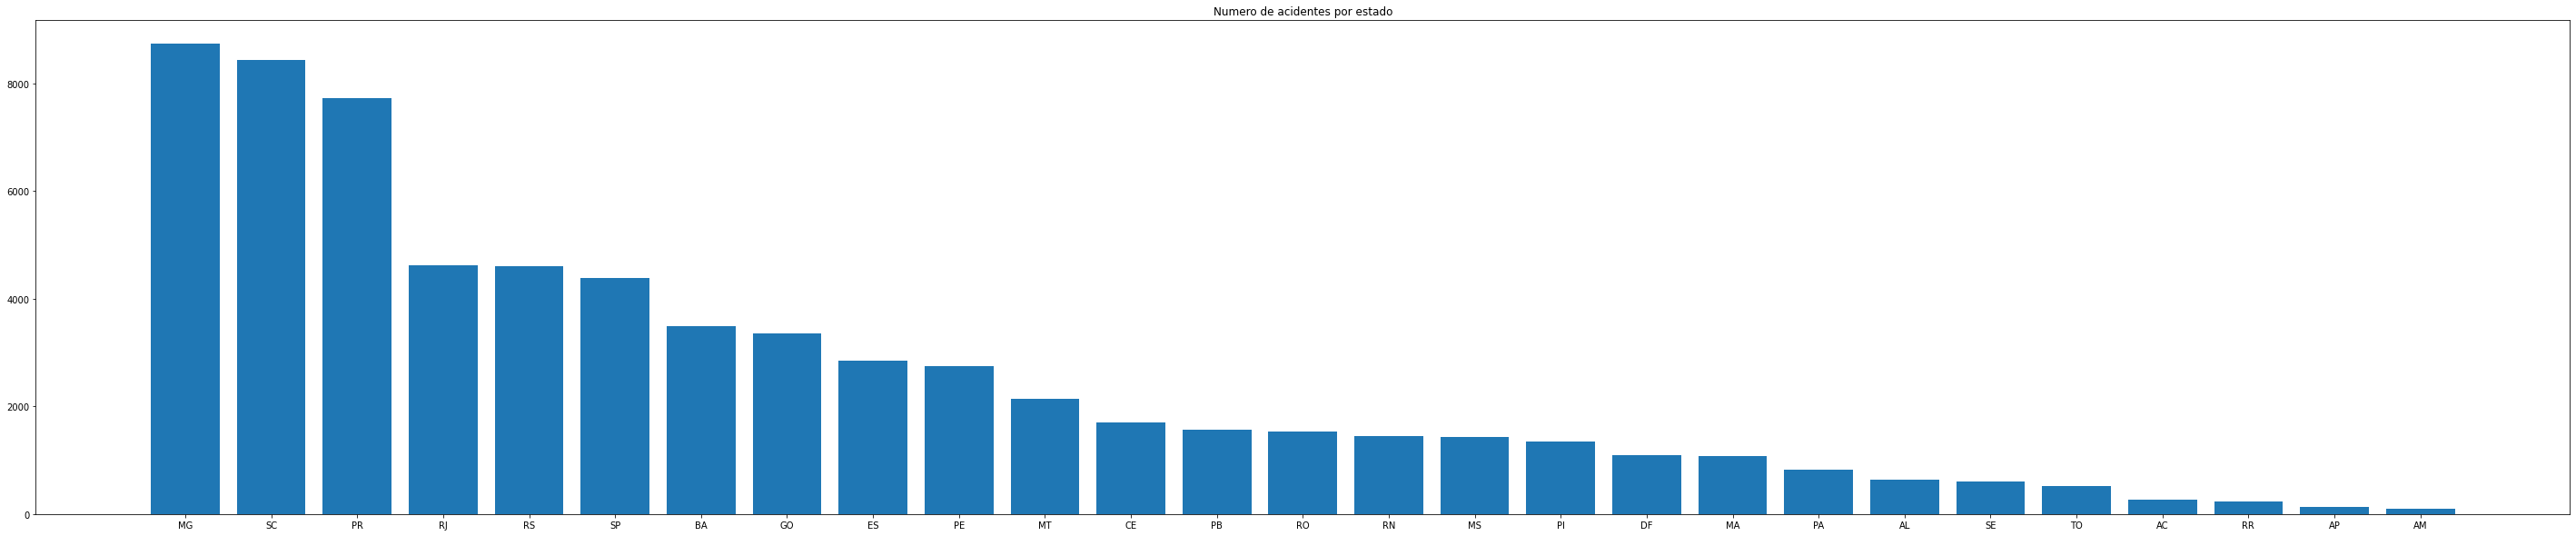

In [105]:
plt.figure(figsize=(50,10))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Numero de acidentes por estado')

In [109]:
graf_dados = df.groupby('uf').count().mortos.sort_values(ascending=False)
graf_dados


uf
MG    8736
SC    8432
PR    7722
RJ    4616
RS    4598
SP    4379
BA    3487
GO    3358
ES    2846
PE    2739
MT    2139
CE    1694
PB    1565
RO    1536
RN    1442
MS    1436
PI    1347
DF    1091
MA    1079
PA     823
AL     630
SE     612
TO     520
AC     262
RR     237
AP     128
AM     102
Name: mortos, dtype: int64

Text(0.5, 1.0, 'Acidentes que mais tem mortos por estado')

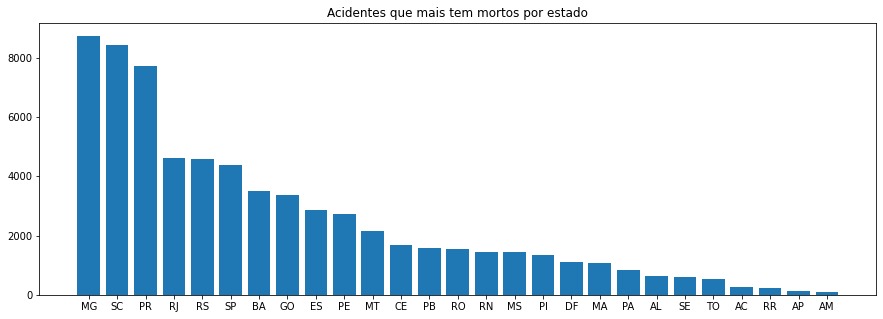

In [110]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Acidentes que mais tem mortos por estado')

In [113]:
graf_dados = df.groupby('causa_acidente').count().mortos.sort_values(ascending=False)
graf_dados

causa_acidente
Falta de Atenção à Condução                                                       25030
Desobediência às normas de trânsito pelo condutor                                  8106
Velocidade Incompatível                                                            6032
Ingestão de Álcool                                                                 5420
Não guardar distância de segurança                                                 4222
Defeito Mecânico no Veículo                                                        3742
Condutor Dormindo                                                                  2483
Pista Escorregadia                                                                 2191
Falta de Atenção do Pedestre                                                       1971
Animais na Pista                                                                   1532
Ultrapassagem Indevida                                                             1175
Defeito na Via   

Text(0.5, 1.0, 'Causa do acidente')

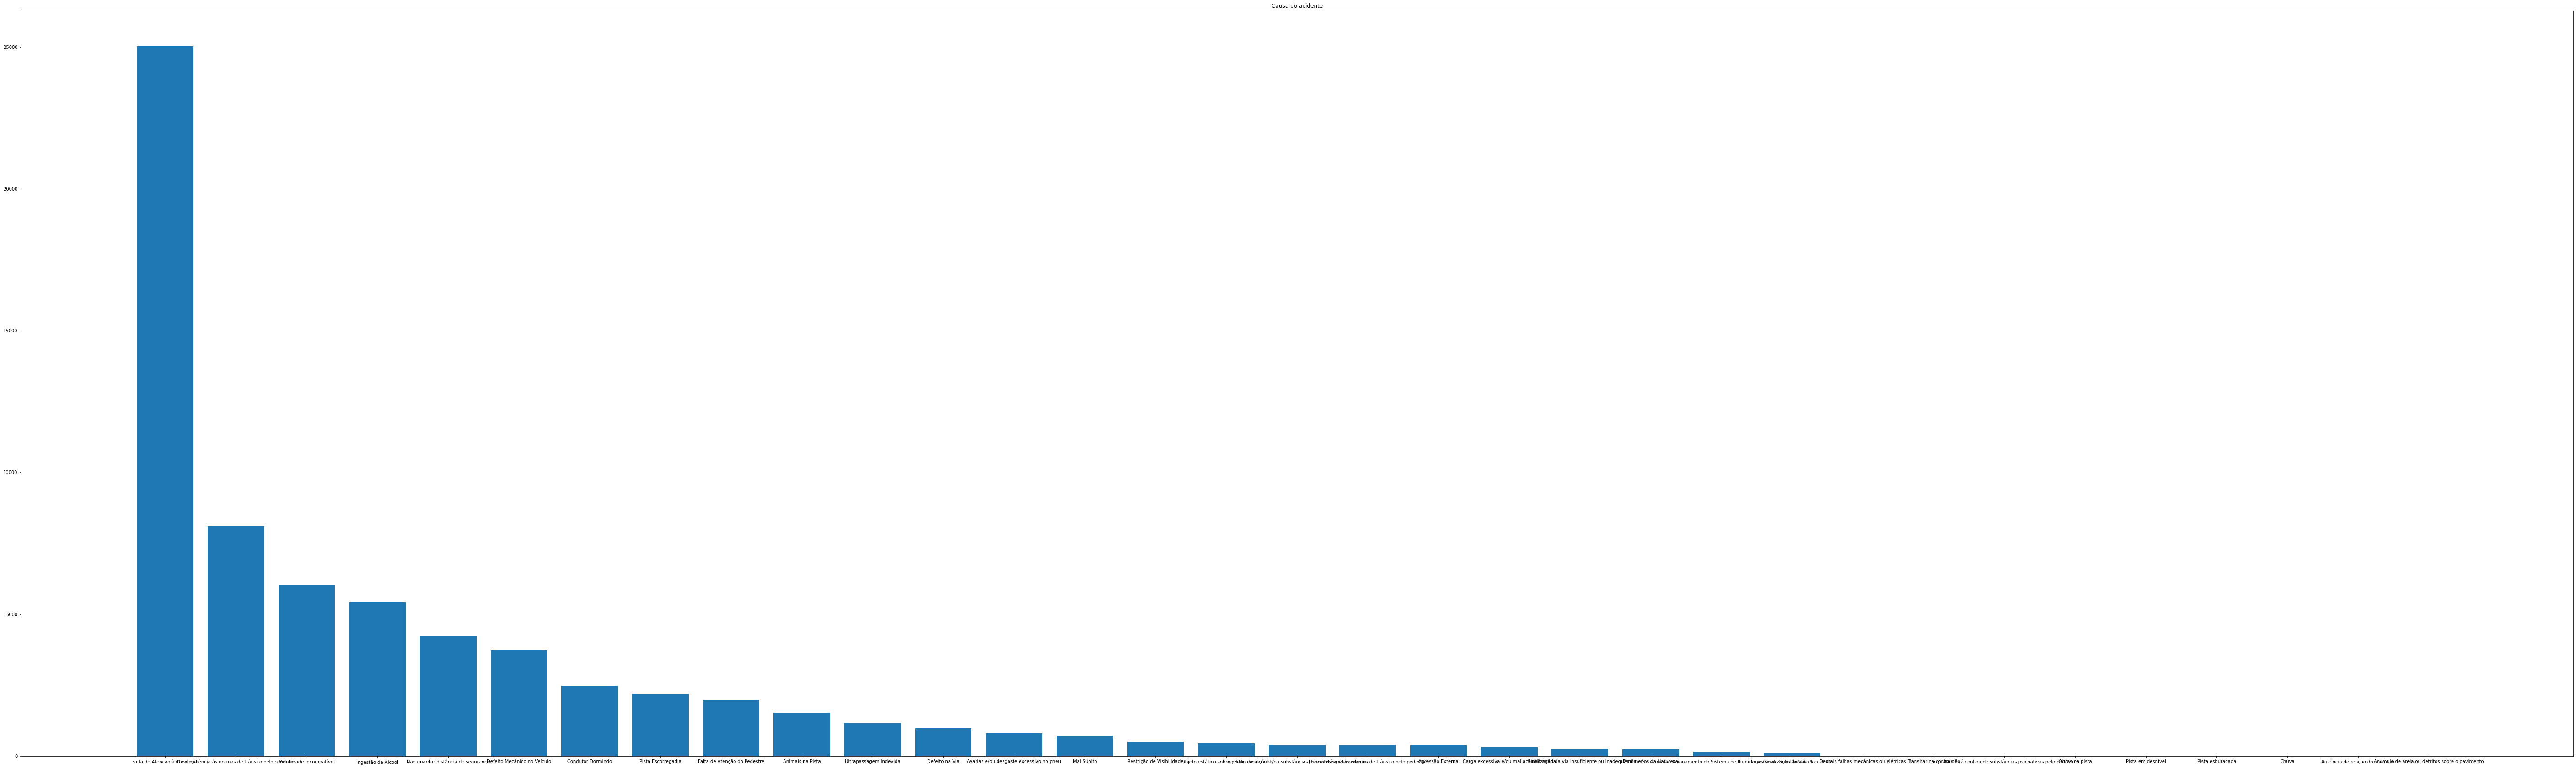

In [118]:
plt.figure(figsize=(100,30))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Causa do acidente')

In [121]:
graf_dados = df.groupby('classificacao_acidente').count().feridos.sort_values(ascending=False) 
graf_dados

classificacao_acidente
Com Vítimas Feridas    51275
Sem Vítimas            11684
Com Vítimas Fatais      4597
Name: feridos, dtype: int64

Text(0.5, 1.0, 'Causa do acidente')

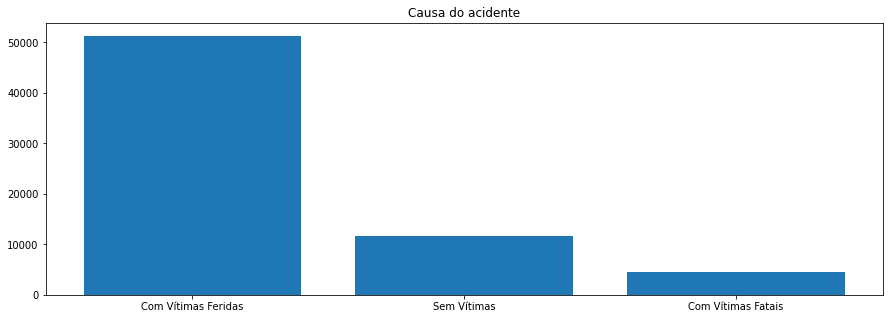

In [123]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Causa do acidente')

In [124]:
dados_x= ['Com Vítimas Feridas', 'Com Vítimas Fatais', 'Sem Vítimas' ]
dados_y= ['51183', '4592', '11671']

fig = px.pie(names=dados_x, values= dados_y, width=700, height=300)
fig.show()

In [125]:
dados_x= ['Com Vítimas Feridas', 'Com Vítimas Fatais', 'Sem Vítimas' ]
dados_y= [51183, 4592, 11671]

fig = px.bar(x=dados_x, y=dados_y, width=400, height=500)
fig.show()